<a href="https://colab.research.google.com/github/dionysusshan/ml/blob/main/variable_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Calculate correlation matrix
correlation_matrix = data[features + [target]].corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix[target].drop(target)

# Set a threshold for correlation with the target
threshold = 0.1

# Select features based on correlation with the target
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Drop features that are highly correlated with each other
def drop_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr()
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                to_drop.add(corr_matrix.columns[i])
    return list(to_drop)

# Select features based on the high correlation threshold
highly_correlated_features = drop_highly_correlated_features(data[selected_features])
selected_features = [feature for feature in selected_features if feature not in highly_correlated_features]

# Final selected features
print("Selected features:", selected_features)

# Optionally, create a new DataFrame with the selected features
filtered_data = data[selected_features + [target]]
print(filtered_data.head())


Selected features: ['PM25', 'PM10', 'Temp(cel)', 'Noise', 'TVOC(ppm)', 'CO(ppm)', 'CO2(ppm)', 'SO2(ppm)', 'NO2(ppm)', 'O3(ppm)', 'AQI-IN(F)', 'CI', 'VI', 'particle count(0 3)']
     PM25    PM10  Temp(cel)   Noise  TVOC(ppm)  CO(ppm)  CO2(ppm)  SO2(ppm)  \
0  64.170  85.939     22.607  48.345      0.009    0.392   482.552     0.002   
1  57.260  75.377     22.373  48.370      0.010    0.454   486.747     0.002   
2  47.045  59.341     24.292  48.078      0.008    0.667   482.067     0.003   
3  39.044  47.500     28.122  50.844      0.008    0.680   462.433     0.002   
4  35.598  42.358     30.972  50.855      0.010    0.697   455.927     0.002   

   NO2(ppm)  O3(ppm)  AQI-IN(F)     CI    VI  particle count(0 3)   AQI-IN  
0     0.008    0.021    114.358  9.873  10.0            19366.709  114.358  
1     0.008    0.023     95.474  9.006  10.0            17307.818   95.474  
2     0.009    0.025     82.128  9.000  10.0            14244.000   78.380  
3     0.009    0.026     77.250  9

In [ ]:
pip install pandas numpy scikit-learn xgboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux"

Root Mean Squared Error: 1.2546021658679338


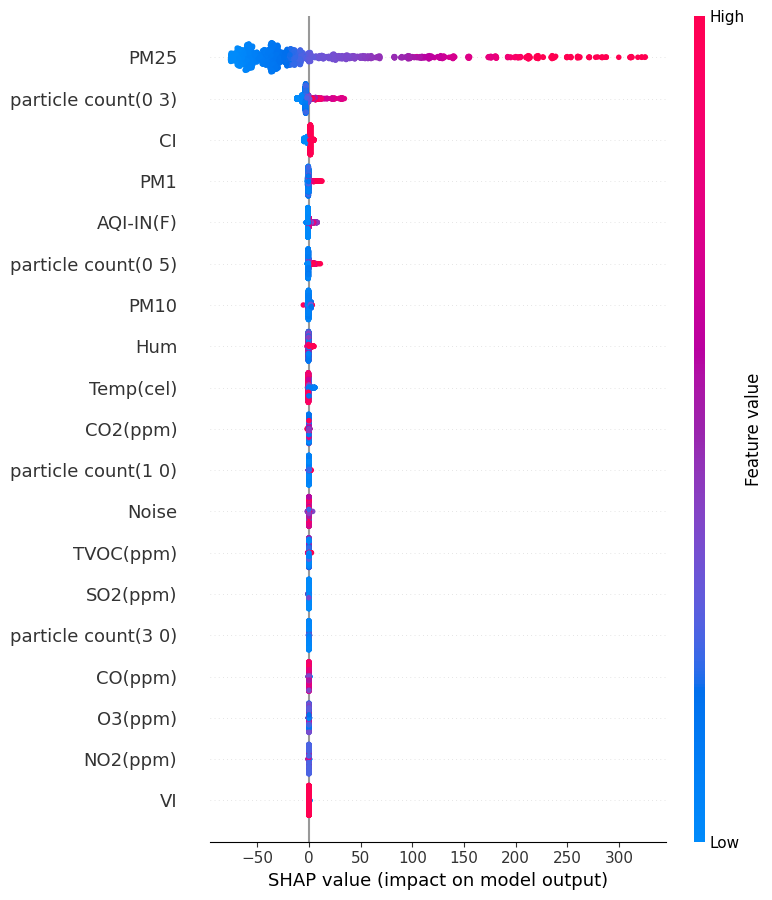

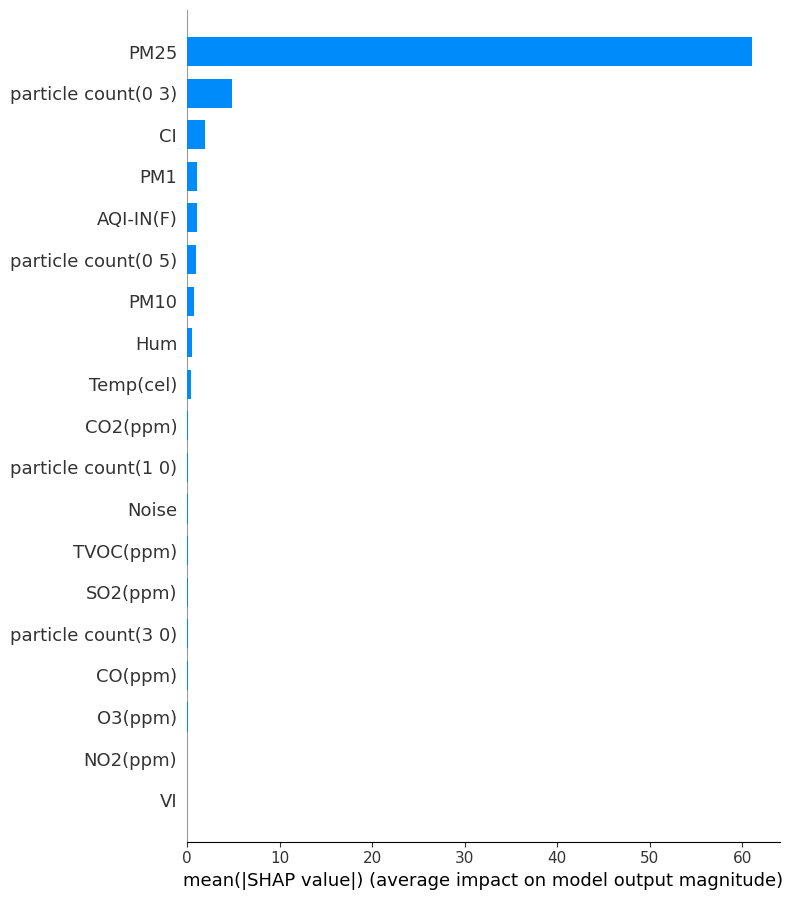

In [ ]:
import pandas as pd
import numpy as np
import shap
from xgboost import XGBClassifier, XGBRegressor # Import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error # Import mean_squared_error

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model instead of classification model
model = XGBRegressor() # Use XGBRegressor for continuous target variable
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred))) # Evaluate using RMSE

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")  # For bar plot of feature importance

Root Mean Squared Error: 1.2546021658679338
SHAP values for the first 5 instances:
Instance 1:
[ 4.55731838  1.49674408 -0.44333016 -0.45435156 -0.62299719  0.0326335
 -0.18724558 -0.04557003  0.19469547  0.09023184  0.19164911  0.26022036
  1.18556171  2.10038817  0.         -1.07028181 -0.30261035  0.35757224
  0.08512436]

Instance 2:
[-5.80179330e+01 -5.39533265e-01 -4.27632024e-01 -6.49196303e-02
 -4.53065962e-01 -3.07967892e-03 -1.56993555e-02 -1.85660575e-02
  1.26911562e-03  7.75583832e-03 -2.37343402e-02  1.13558308e-03
 -1.03779312e+00  1.41252679e+00  0.00000000e+00 -4.52695639e+00
 -5.48724738e-01 -3.08954276e-02 -3.01737083e-02]

Instance 3:
[ 4.43686055e+01  2.21086471e+00  2.94310127e-02 -1.96854383e-01
 -4.50658179e-01 -1.41973265e-02  4.77223710e-02  1.10843093e-01
  3.60900897e-01  5.56570022e-02 -1.23642222e-01 -1.35087390e-01
 -6.44998763e-01  1.01851107e+00  0.00000000e+00  1.06301658e+00
 -2.86784404e-01  5.43379386e-02  1.25732810e-01]

Instance 4:
[-0.11764623  

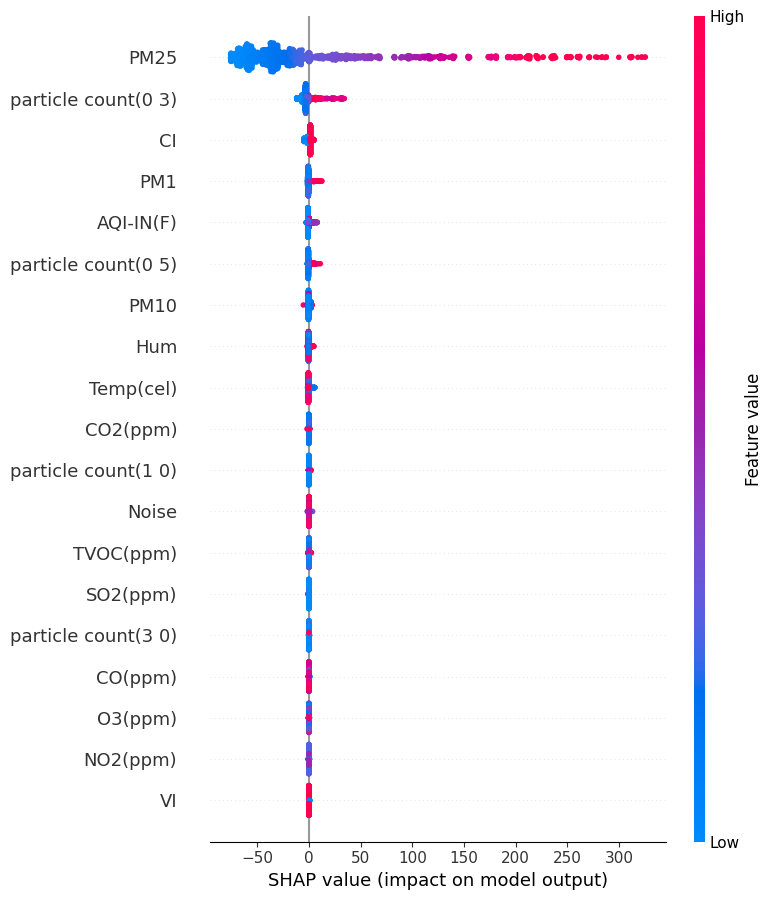

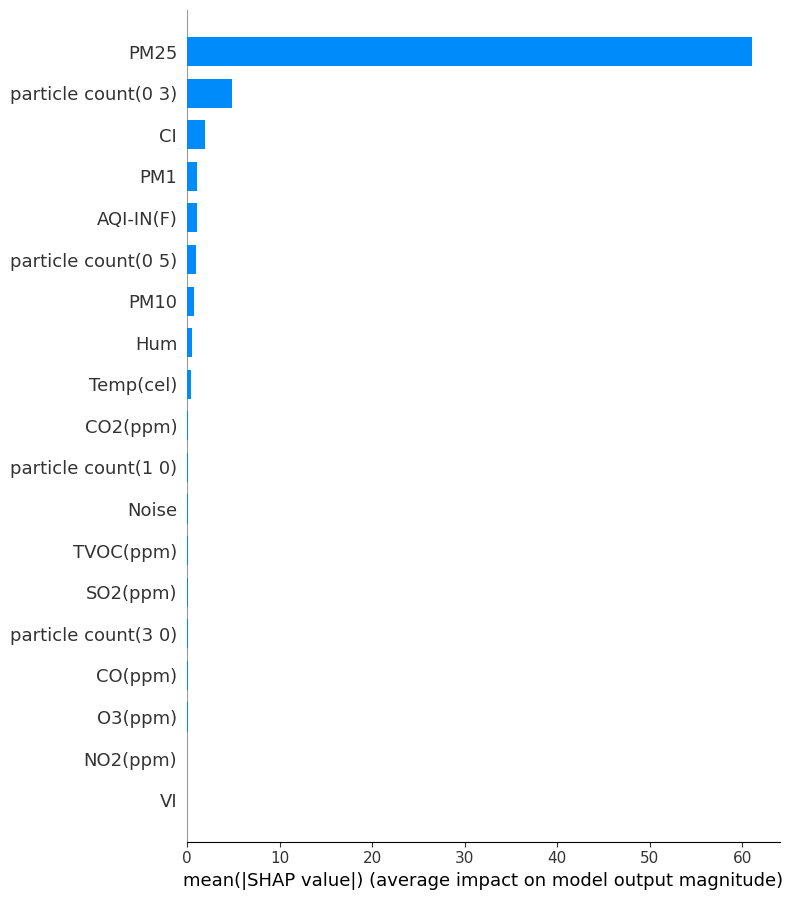

In [ ]:
import pandas as pd
import numpy as np
import shap
from xgboost import XGBRegressor  # Import XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error  # Import mean_squared_error for regression

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model instead of a classification model
model = XGBRegressor()  # Use XGBRegressor for a continuous target variable
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Evaluate using RMSE

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Print SHAP values for the first few instances
print("SHAP values for the first 5 instances:")
for i in range(5):
    print(f"Instance {i+1}:")
    print(shap_values[i].values)
    print()

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")  # For bar plot of feature importance

Feature Importances:
                Feature  Random Forest Importance  \
0                  PM25              9.841369e-01   
15  particle count(0 3)              1.488721e-02   
2                   PM1              3.637660e-04   
12            AQI-IN(F)              3.158405e-04   
13                   CI              1.309590e-04   
1                  PM10              4.151867e-05   
4                   Hum              3.573683e-05   
3             Temp(cel)              1.802805e-05   
16  particle count(0 5)              1.636098e-05   
5                 Noise              9.104181e-06   
18  particle count(3 0)              8.657713e-06   
7               CO(ppm)              7.996343e-06   
17  particle count(1 0)              7.476171e-06   
9              SO2(ppm)              6.248304e-06   
8              CO2(ppm)              6.015633e-06   
6             TVOC(ppm)              4.156760e-06   
11              O3(ppm)              1.843011e-06   
10             NO2(ppm)  

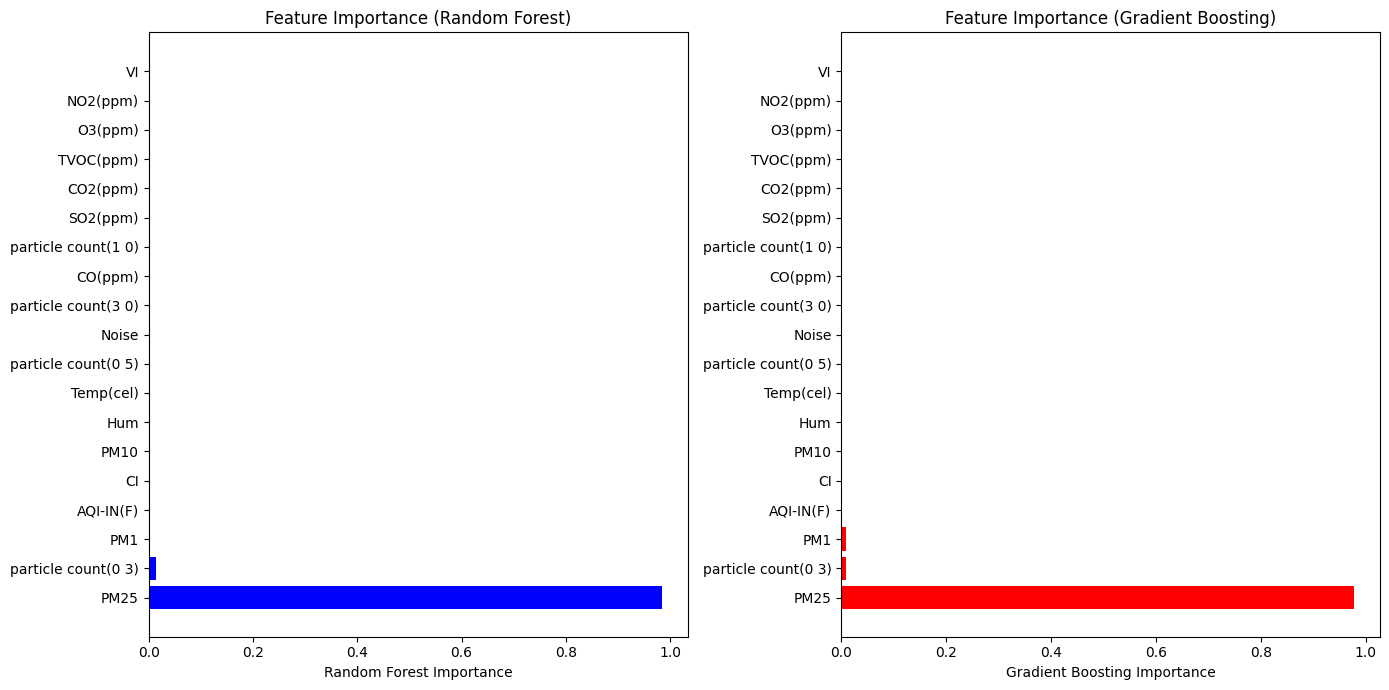

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Use Regressors
from sklearn.metrics import mean_squared_error # Use a regression metric

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for regression
rf_model = RandomForestRegressor() # Changed to RandomForestRegressor
rf_model.fit(X_train, y_train)

# Train a Gradient Boosting model for regression
gb_model = GradientBoostingRegressor() # Changed to GradientBoostingRegressor
gb_model.fit(X_train, y_train)

# Get feature importance from Random Forest
rf_importances = rf_model.feature_importances_

# Get feature importance from Gradient Boosting
gb_importances = gb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_importances,
    'Gradient Boosting Importance': gb_importances
})

# Sort the DataFrame by Random Forest importance
importance_df = importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(14, 7))

# Plot Random Forest importance
plt.subplot(1, 2, 1)
plt.barh(importance_df['Feature'], importance_df['Random Forest Importance'], color='b')
plt.xlabel('Random Forest Importance')
plt.title('Feature Importance (Random Forest)')

# Plot Gradient Boosting importance
plt.subplot(1, 2, 2)
plt.barh(importance_df['Feature'], importance_df['Gradient Boosting Importance'], color='r')
plt.xlabel('Gradient Boosting Importance')
plt.title('Feature Importance (Gradient Boosting)')

plt.tight_layout()
plt.show()

Root Mean Squared Error: 1.188351017064894
Permutation Feature Importances:
                Feature    Importance
0                  PM25  16966.342030
15  particle count(0 3)    227.684438
13                   CI      5.973827
12            AQI-IN(F)      4.743560
2                   PM1      0.863601
4                   Hum      0.614657
1                  PM10      0.253971
16  particle count(0 5)      0.186357
3             Temp(cel)      0.111483
18  particle count(3 0)      0.104443
17  particle count(1 0)      0.083090
7               CO(ppm)      0.046544
9              SO2(ppm)      0.042274
5                 Noise      0.034608
14                   VI      0.017758
8              CO2(ppm)      0.017710
10             NO2(ppm)     -0.002605
6             TVOC(ppm)     -0.003277
11              O3(ppm)     -0.009440


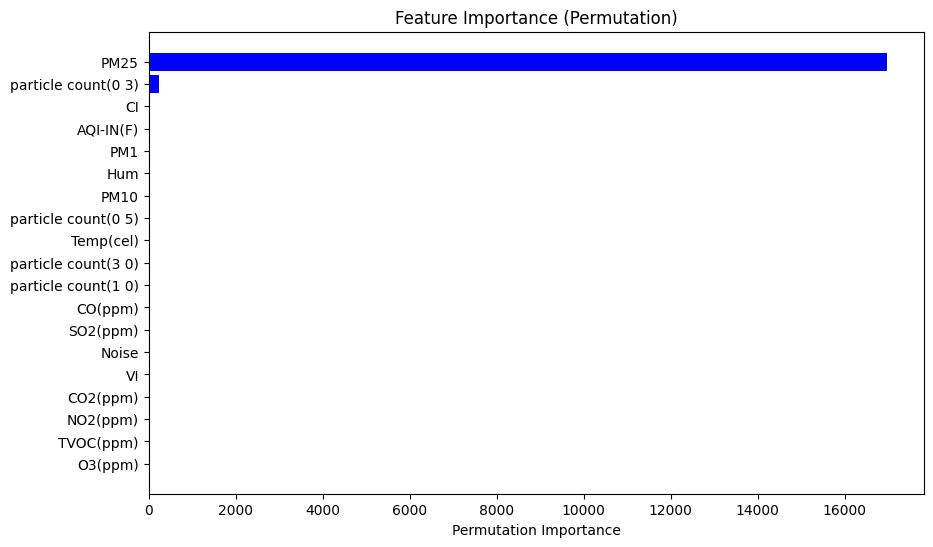

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor # Use a regressor for continuous target
from sklearn.metrics import mean_squared_error # Use a regression metric
from sklearn.inspection import permutation_importance

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for regression
model = RandomForestRegressor() # Changed to RandomForestRegressor
model.fit(X_train, y_train)

# Evaluate the model using a regression metric (e.g., Mean Squared Error)
y_pred = model.predict(X_test)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Calculate Permutation Feature Importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error') # Use a regression scoring metric

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': results.importances_mean
})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Permutation Feature Importances:")
print(importance_df)

# Optional: Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor # Use a regressor for continuous target
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error # Use a regression metric

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model # Changed to RandomForestRegressor
model = RandomForestRegressor()

# Apply RFE to select the best features
rfe = RFE(estimator=model, n_features_to_select=5)  # Specify the number of features to select
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame for feature rankings
ranking_df = pd.DataFrame({
    'Feature': features,
    'Ranking': ranking
})

# Sort the DataFrame by ranking (lower is better)
ranking_df = ranking_df.sort_values(by='Ranking')

# Print the feature rankings
print("Feature Rankings:")
print(ranking_df)

# Optionally, retrain the model using only the selected features
selected_features = ranking_df[ranking_df['Ranking'] == 1]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Evaluate the model with selected features using a regression metric (e.g., RMSE) # Changed to RMSE
y_pred = model.predict(X_test_selected)
print("Root Mean Squared Error with Selected Features:", np.sqrt(mean_squared_error(y_test, y_pred)))

Feature Rankings:
                Feature  Ranking
0                  PM25        1
2                   PM1        1
15  particle count(0 3)        1
13                   CI        1
12            AQI-IN(F)        1
1                  PM10        2
4                   Hum        3
3             Temp(cel)        4
16  particle count(0 5)        5
18  particle count(3 0)        6
5                 Noise        7
9              SO2(ppm)        8
8              CO2(ppm)        9
7               CO(ppm)       10
17  particle count(1 0)       11
6             TVOC(ppm)       12
10             NO2(ppm)       13
11              O3(ppm)       14
14                   VI       15
Root Mean Squared Error with Selected Features: 1.1961370834889147


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+05, tolerance: 5.203e+03
  model = cd_fast.enet_coordinate_descent(


Feature Coefficients from Regularization:
                Feature  Lasso Coefficient  Ridge Coefficient  \
2                   PM1          69.364571         131.371448   
16  particle count(0 5)          50.674674          87.582221   
17  particle count(1 0)         -38.610214         -37.370118   
0                  PM25         -16.788895        -118.132068   
18  particle count(3 0)          14.300657          19.950934   
15  particle count(0 3)          13.899957          10.332348   
8              CO2(ppm)           5.857669           5.662596   
13                   CI           5.692594           5.326210   
3             Temp(cel)           2.852138           5.929444   
1                  PM10           2.221831           4.449151   
4                   Hum          -2.181124          -0.708712   
11              O3(ppm)          -1.699410          -1.043079   
10             NO2(ppm)          -1.345035          -1.437835   
5                 Noise          -1.200284      

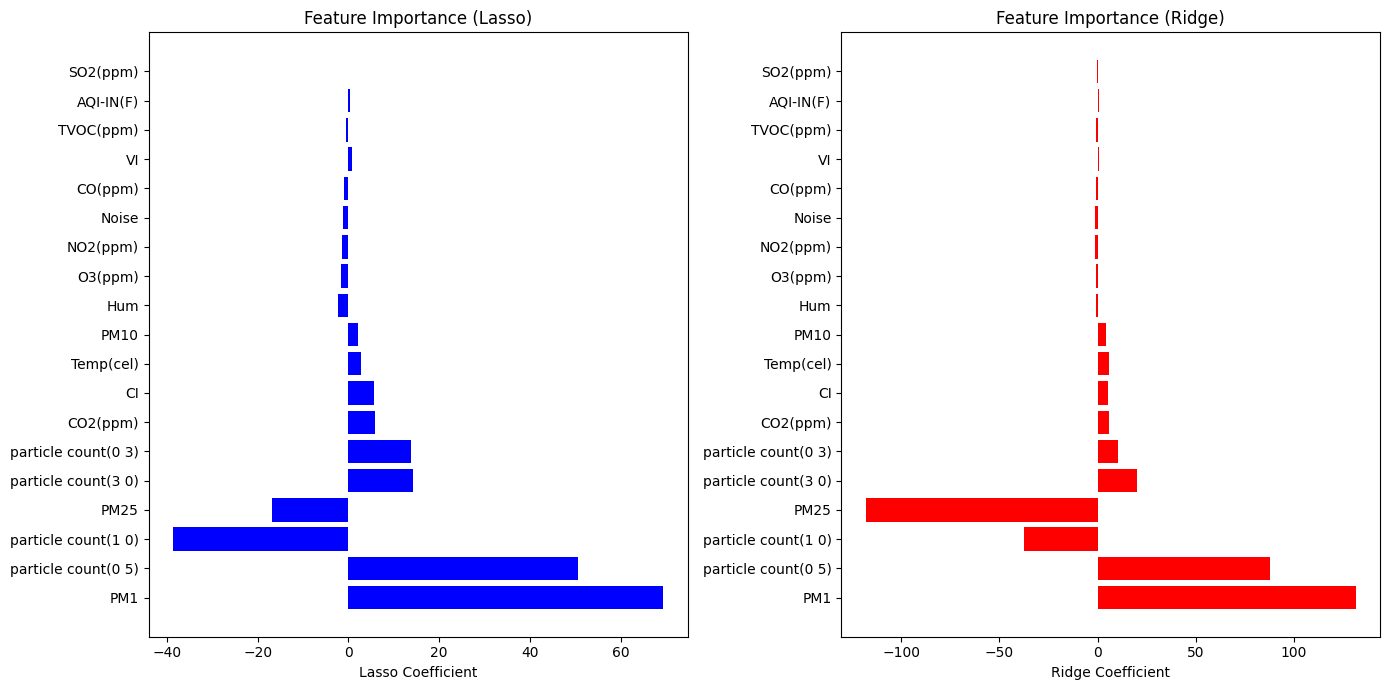

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Lasso model (L1 regularization)
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Train a Ridge model (L2 regularization)
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# Get the coefficients for Lasso and Ridge
lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

# Create a DataFrame for feature coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Lasso Coefficient': lasso_coef,
    'Ridge Coefficient': ridge_coef
})

# Sort the DataFrame by Lasso coefficient (absolute value)
coef_df['Abs Lasso Coefficient'] = coef_df['Lasso Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs Lasso Coefficient', ascending=False)

# Print the feature coefficients
print("Feature Coefficients from Regularization:")
print(coef_df)

# Optional: Plot feature coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Lasso coefficients
plt.subplot(1, 2, 1)
plt.barh(coef_df['Feature'], coef_df['Lasso Coefficient'], color='b')
plt.xlabel('Lasso Coefficient')
plt.title('Feature Importance (Lasso)')

# Plot Ridge coefficients
plt.subplot(1, 2, 2)
plt.barh(coef_df['Feature'], coef_df['Ridge Coefficient'], color='r')
plt.xlabel('Ridge Coefficient')
plt.title('Feature Importance (Ridge)')

plt.tight_layout()
plt.show()


In [ ]:
pip install pandas numpy scikit-learn boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.1 MB/s eta 0:00:00


Mutual Information Scores:
                Feature  Mutual Information
0                  PM25            6.263492
15  particle count(0 3)            5.244178
2                   PM1            4.501547
1                  PM10            3.414735
16  particle count(0 5)            2.971416
12            AQI-IN(F)            2.744613
17  particle count(1 0)            2.454753
18  particle count(3 0)            2.273353
8              CO2(ppm)            1.360431
3             Temp(cel)            1.283580
4                   Hum            1.163622
7               CO(ppm)            1.064593
13                   CI            1.029039
5                 Noise            0.894645
11              O3(ppm)            0.890140
6             TVOC(ppm)            0.864284
9              SO2(ppm)            0.777952
10             NO2(ppm)            0.490803
14                   VI            0.011049


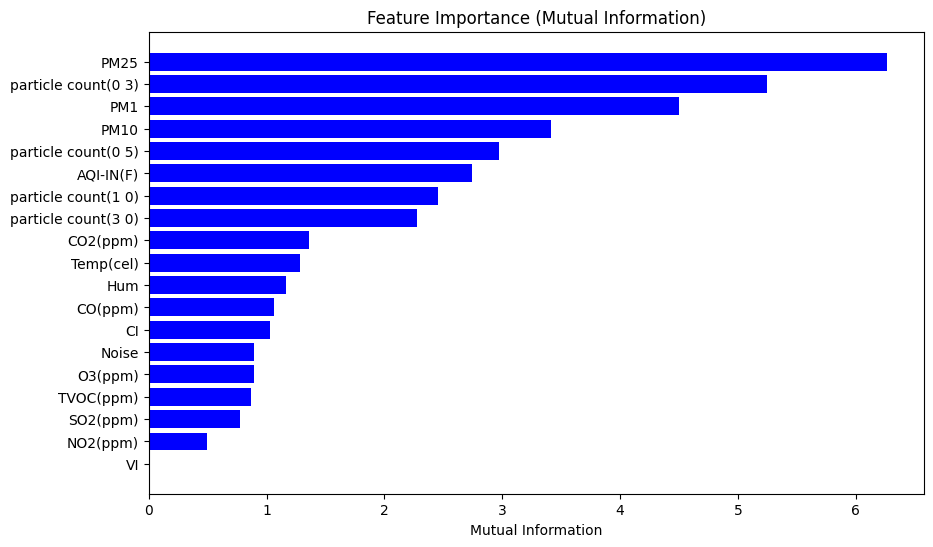

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features].values
y = data[target].values

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose mutual_info_classif or mutual_info_regression based on the type of target
# If the target is categorical, use mutual_info_classif; if continuous, use mutual_info_regression
if data[target].dtype == 'object' or len(np.unique(y)) < 20:  # Example condition for classification
    mi = mutual_info_classif(X, y, random_state=42)
else:
    mi = mutual_info_regression(X, y, random_state=42)

# Create a DataFrame for mutual information scores
mi_df = pd.DataFrame({
    'Feature': features,
    'Mutual Information': mi
})

# Sort the DataFrame by MI score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print the MI scores
print("Mutual Information Scores:")
print(mi_df)

# Plot the MI scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='b')
plt.xlabel('Mutual Information')
plt.title('Feature Importance (Mutual Information)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Load the data from a CSV file
data = pd.read_csv('/content/sample_data/imputed_datasetknn.csv')

# Define the target variable and feature columns
target = 'AQI-IN'
features = [col for col in data.columns if col != target]

# Handle missing values (if any) and encode categorical variables
data = data.fillna(0)  # Fill missing values with 0 or use other imputation methods
for col in features:
    if data[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the data into features and target
X = data[features].values
y = data[target].values

# Apply Variance Thresholding
# Setting threshold=0 will remove all features that have the same value in all samples
threshold = 0.1  # Adjust this threshold based on your needs
vt = VarianceThreshold(threshold=threshold)
X_vt = vt.fit_transform(X)

# Get the features that were kept
features_kept = np.array(features)[vt.get_support()]

# Print the selected features
print(f"Selected Features with Variance > {threshold}:")
print(features_kept)

# Get the features that were removed
features_removed = np.array(features)[~vt.get_support()]

# Print the removed features
print(f"\nRemoved Features with Variance ≤ {threshold}:")
print(features_removed)


Selected Features with Variance > 0.1:
['PM25' 'PM10' 'PM1' 'Temp(cel)' 'Hum' 'Noise' 'CO2(ppm)' 'SO2(ppm)'
 'AQI-IN(F)' 'CI' 'particle count(0 3)' 'particle count(0 5)'
 'particle count(1 0)' 'particle count(3 0)']

Removed Features with Variance ≤ 0.1:
['TVOC(ppm)' 'CO(ppm)' 'NO2(ppm)' 'O3(ppm)' 'VI']
